In [29]:
# Cell 1: Import necessary libraries
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [41]:
# Cell 2: Define the video URL and extract the video ID
youtube_video = "https://www.youtube.com/watch?v=gQF09f-cZ-E"
video_id = youtube_video.split("=")[1]
video_id

'gQF09f-cZ-E'

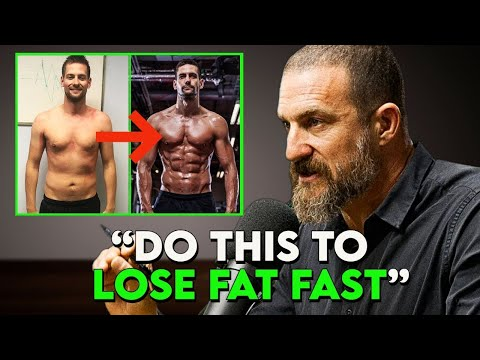

In [42]:
# Cell 3: Get thumbnail of the video
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [43]:
# Cell 4: Get the transcript from YouTube
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [44]:
# Cell 5: Combine transcript text into a single string
result = " ".join([item['text'] for item in transcript])
len(result)  # Check the length of the combined text

8863

In [45]:
# Cell 6: Load the summarization model
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [46]:
# Cell 7: Split the transcript into manageable chunks and summarize
max_chunk_size = 1000
num_iters = len(result) // max_chunk_size
summarized_text = []

for i in range(num_iters + 1):
    start = i * max_chunk_size
    end = (i + 1) * max_chunk_size
    chunk = result[start:end]
    if chunk.strip():  # Avoid processing empty chunks
        out = summarizer(chunk, max_length=150, min_length=50, do_sample=False)
        summarized_text.append(out[0]['summary_text'])

In [47]:
# Cell 8: Format the summarized text into paragraphs
formatted_output = "\n\n".join(
    [".\n".join(sentence.strip() for sentence in paragraph.split('. ') if sentence).strip() + "."
     for paragraph in summarized_text]
)

# Print the formatted output
print(formatted_output)

What you eat and when you eat set conditions in your body and those conditions can be very good for you or very bad for you depending on the time you eat.
When you eat is as important as what you eat it sets conditions in the body.
Intermittent fasting can have a very powerful and positive impact on everything from weight loss and fat loss ..

insulin and glucose go up when we eat and it takes some period of time for them to go down even if we stop eating they will remain up for some time and then go back down it takes time this is very important that the feeding window fall during the more active phase of one's day ..

In intermittent fasting, restricting food to a particular phase of the 24-hour cycle benefit things like lean body mass and fat loss and a number of Health parameters that I'll talk about in a moment.
It also anchored all the gene systems of the body and provided a more regular stable so-called circadian rhythm ..

Not eating any food or ingesting any calories liquid or